In [65]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import tensorflow as tf
import cartopy.crs as ccrs
import cartopy

In [66]:
# converting the dataset to dataframe
dataframe_earthquake=pd.read_csv(r"D:\datasets2\earthquake.csv")
dataframe_earthquake

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.2460,145.6160,Earthquake,131.60,NaN,NaN,6.0,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.8630,127.3520,Earthquake,80.00,NaN,NaN,5.8,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.5790,-173.9720,Earthquake,20.00,NaN,NaN,6.2,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.0760,-23.5570,Earthquake,15.00,NaN,NaN,5.8,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.9380,126.4270,Earthquake,15.00,NaN,NaN,5.8,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23407,12/28/2016,08:22:12,38.3917,-118.8941,Earthquake,12.30,1.2,40.0,5.6,ML,0.320,18.0,42.47,0.120,NaN,0.1898,NN00570710,NN,NN,NN,Reviewed
23408,12/28/2016,09:13:47,38.3777,-118.8957,Earthquake,8.80,2.0,33.0,5.5,ML,0.260,18.0,48.58,0.129,NaN,0.2187,NN00570744,NN,NN,NN,Reviewed
23409,12/28/2016,12:38:51,36.9179,140.4262,Earthquake,10.00,1.8,NaN,5.9,MWW,NaN,NaN,91.00,0.992,4.8,1.5200,US10007NAF,US,US,US,Reviewed
23410,12/29/2016,22:30:19,-9.0283,118.6639,Earthquake,79.00,1.8,NaN,6.3,MWW,NaN,NaN,26.00,3.553,6.0,1.4300,US10007NL0,US,US,US,Reviewed


In [67]:
# the information about the dataframe like column types
dataframe_earthquake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        23412 non-null  object 
 1   Time                        23412 non-null  object 
 2   Latitude                    23412 non-null  float64
 3   Longitude                   23412 non-null  float64
 4   Type                        23412 non-null  object 
 5   Depth                       23412 non-null  float64
 6   Depth Error                 4461 non-null   float64
 7   Depth Seismic Stations      7097 non-null   float64
 8   Magnitude                   23412 non-null  float64
 9   Magnitude Type              23409 non-null  object 
 10  Magnitude Error             327 non-null    float64
 11  Magnitude Seismic Stations  2564 non-null   float64
 12  Azimuthal Gap               7299 non-null   float64
 13  Horizontal Distance         160

In [68]:
# finding the corrupted data in the date column
date_length=dataframe_earthquake.Date.str.len()
date_length.value_counts()

Date
10    23409
24        3
Name: count, dtype: int64

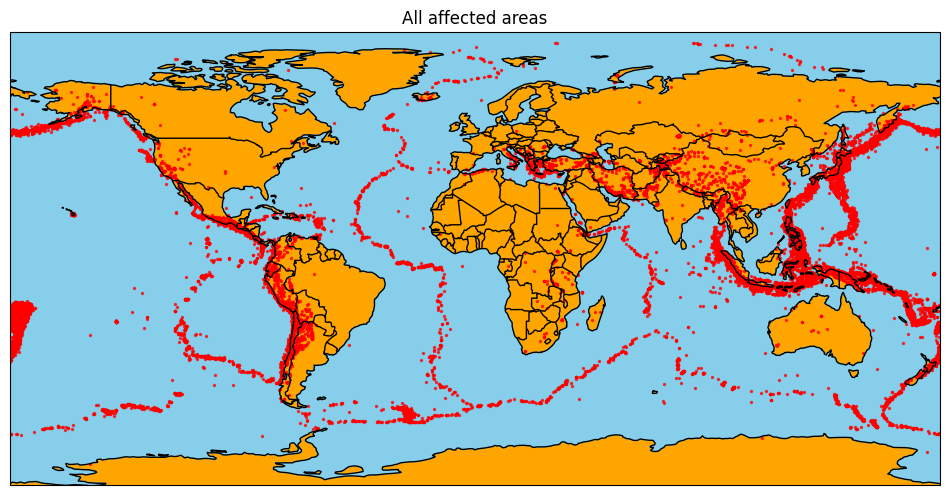

In [78]:
# Define the projection and extent
projection = ccrs.PlateCarree()
extent = (-180, 180, -80, 80)

# Create a figure and axis with Cartopy
fig, ax = plt.subplots(figsize=(12, 10), subplot_kw={'projection': projection})

# Plot the map
ax.set_title("All affected areas")
ax.scatter(dataframe_earthquake["Longitude"], dataframe_earthquake["Latitude"], transform=projection, s=2, color='red',alpha=0.7)
ax.coastlines()
ax.add_feature(cartopy.feature.LAND, color='orange')
ax.add_feature(cartopy.feature.OCEAN, color='skyblue')
ax.add_feature(cartopy.feature.BORDERS)

# Show the plot
plt.show()


In [6]:
# finding the indices where the row with particular dates are corrrupted
indices=np.where([date_length==24])[1]
print("Indices with corrupted data: ",indices)
dataframe_earthquake.loc[indices]

Indices with corrupted data:  [ 3378  7512 20650]


,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
3378,1975-02-23T02:58:41.000Z,1975-02-23T02:58:41.000Z,8.017,124.075,Earthquake,623.0,NaN,NaN,5.6,MB,NaN,NaN,NaN,NaN,NaN,NaN,USP0000A09,US,US,US,Reviewed
7512,1985-04-28T02:53:41.530Z,1985-04-28T02:53:41.530Z,-32.998,-71.766,Earthquake,33.0,NaN,NaN,5.6,MW,NaN,NaN,NaN,NaN,NaN,1.30,USP0002E81,US,US,HRV,Reviewed
20650,2011-03-13T02:23:34.520Z,2011-03-13T02:23:34.520Z,36.344,142.344,Earthquake,10.1,13.9,289.0,5.8,MWC,NaN,NaN,32.3,NaN,NaN,1.06,USP000HWQP,US,US,GCMT,Reviewed


In [7]:
# managing the currupted data in date column
dataframe_earthquake.loc[3378,'Date']="02/23/1975"
dataframe_earthquake.loc[7512, "Date"] = "04/28/1985"
dataframe_earthquake.loc[20650, "Date"] = "03/13/2011"
dataframe_earthquake['Date']=pd.to_datetime(dataframe_earthquake['Date'],format="%m/%d/%Y")
#dataframe_earthquake['timestamp']=dataframe_earthquake['Date'].apply(lambda x:x.timestamp())

In [8]:
# droping the time column in dataframe
dataframe_earthquake.set_index('Date',inplace=True)
dataframe_earthquake.drop(['Time'],axis=1,inplace=True)
dataframe_earthquake.head()

,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
Date,,,,,,,,,,,,,,,,,,,
1965-01-02,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1965-01-04,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
1965-01-05,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
1965-01-08,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
1965-01-09,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [9]:
# checking the null values in the dataframe
dataframe_earthquake.isnull().sum()

Latitude                          0
Longitude                         0
Type                              0
Depth                             0
Depth Error                   18951
Depth Seismic Stations        16315
Magnitude                         0
Magnitude Type                    3
Magnitude Error               23085
Magnitude Seismic Stations    20848
Azimuthal Gap                 16113
Horizontal Distance           21808
Horizontal Error              22256
Root Mean Square               6060
ID                                0
Source                            0
Location Source                   0
Magnitude Source                  0
Status                            0
dtype: int64

In [10]:
# removing the columns which have missing values more than 10 % of the whole data and if not than filling with median values of the column
# with numericale datatype and mode with string datatype
def process_missing_values(df):
    null_counts=dataframe_earthquake.isnull().sum()

    for column in df.columns:
        if null_counts[column]>df.shape[0]*0.1:
            df.drop(column,axis=1,inplace=True)
        else:
            if df[column].dtype=='float64':
                median_value = df[column].median()
                df[column] = df[column].fillna(median_value)
            else:
                most_common = dataframe_earthquake[column].mode().iloc[0]
                df[column] = df[column].fillna(most_common)
    return df


In [11]:
# plotting the graph for missing values in the dataframe for respective column
def plot_missing_values(df):
    null_counts=dataframe_earthquake.isnull().sum()
    null_counts=null_counts[null_counts>0]
    null_counts=null_counts.sort_values(ascending=False)

    plt.figure(figsize=(10,6))
    null_counts.plot(kind='bar')
    plt.xlabel('Columns')
    plt.ylabel('Missing Values')
    plt.title('Missing Values In Each Column')
    plt.xticks(rotation=90)
    plt.show()

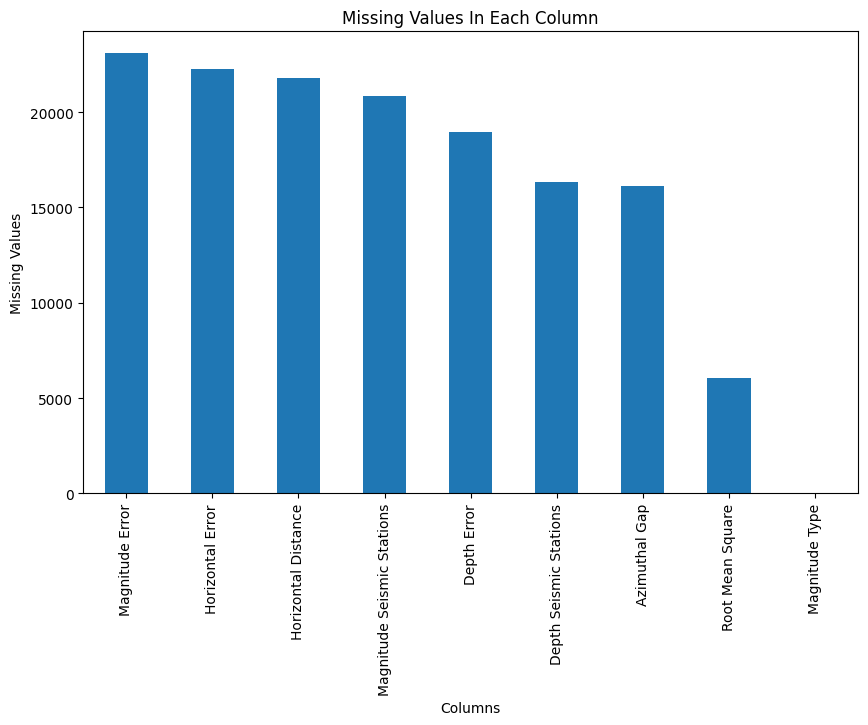

In [12]:
plot_missing_values(dataframe_earthquake)

In [13]:
# target column
dataframe_earthquake['Status'].value_counts()

Status
Reviewed     20773
Automatic     2639
Name: count, dtype: int64

In [14]:
dataframe_earthquake.sample(8)

,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
Date,,,,,,,,,,,,,,,,,,,
1981-09-30,-4.798,-112.008,Earthquake,10.0,NaN,NaN,5.9,MB,NaN,36.0,NaN,NaN,NaN,1.0,USP0001G7G,US,US,US,Reviewed
1972-12-28,-21.569,169.912,Earthquake,15.0,NaN,NaN,6.0,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM766756,ISCGEM,ISCGEM,ISCGEM,Automatic
1974-11-20,-53.566,-28.345,Earthquake,33.0,NaN,NaN,6.0,MB,NaN,NaN,NaN,NaN,NaN,NaN,USP00008UZ,US,US,US,Reviewed
1991-03-23,48.261,154.854,Earthquake,40.5,NaN,NaN,5.6,MW,NaN,NaN,NaN,NaN,NaN,0.8,USP0004PEG,US,US,HRV,Reviewed
1985-08-27,-17.530,-173.300,Earthquake,36.3,NaN,NaN,5.7,MW,NaN,NaN,NaN,NaN,NaN,1.0,USP0002J6B,US,US,HRV,Reviewed
1969-07-16,52.170,158.845,Earthquake,57.3,NaN,NaN,5.9,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM807098,ISCGEM,ISCGEM,ISCGEM,Automatic
1995-05-16,43.409,147.844,Earthquake,33.4,NaN,NaN,5.5,MB,NaN,71.0,NaN,NaN,NaN,1.1,USP0006XGM,US,US,US,Reviewed
1990-01-14,-29.080,-177.628,Earthquake,33.0,NaN,NaN,5.7,MS,NaN,2.0,NaN,NaN,NaN,1.2,USP000449P,US,US,US,Reviewed


In [15]:
# removing columns with missing values
dataframe_earthquake=process_missing_values(dataframe_earthquake)
dataframe_earthquake

,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,ID,Source,Location Source,Magnitude Source,Status
Date,,,,,,,,,,,
1965-01-02,19.2460,145.6160,Earthquake,131.60,6.0,MW,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1965-01-04,1.8630,127.3520,Earthquake,80.00,5.8,MW,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
1965-01-05,-20.5790,-173.9720,Earthquake,20.00,6.2,MW,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
1965-01-08,-59.0760,-23.5570,Earthquake,15.00,5.8,MW,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
1965-01-09,11.9380,126.4270,Earthquake,15.00,5.8,MW,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic
...,...,...,...,...,...,...,...,...,...,...,...
2016-12-28,38.3917,-118.8941,Earthquake,12.30,5.6,ML,NN00570710,NN,NN,NN,Reviewed
2016-12-28,38.3777,-118.8957,Earthquake,8.80,5.5,ML,NN00570744,NN,NN,NN,Reviewed
2016-12-28,36.9179,140.4262,Earthquake,10.00,5.9,MWW,US10007NAF,US,US,US,Reviewed


In [16]:
# describing the dataset
dataframe_earthquake.describe()

,Latitude,Longitude,Depth,Magnitude
count,23412.000000,23412.000000,23412.000000,23412.000000
mean,1.679033,39.639961,70.767911,5.882531
std,30.113183,125.511959,122.651898,0.423066
min,-77.080000,-179.997000,-1.100000,5.500000
25%,-18.653000,-76.349750,14.522500,5.600000
50%,-3.568500,103.982000,33.000000,5.700000
75%,26.190750,145.026250,54.000000,6.000000
max,86.005000,179.998000,700.000000,9.100000


<Axes: xlabel='Magnitude'>

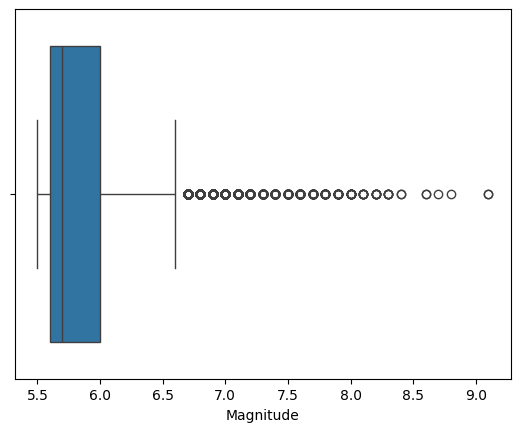

In [17]:
# checking the magnitude column with boxplot
sns.boxplot(data=dataframe_earthquake,x='Magnitude')

<Axes: xlabel='Magnitude', ylabel='Count'>

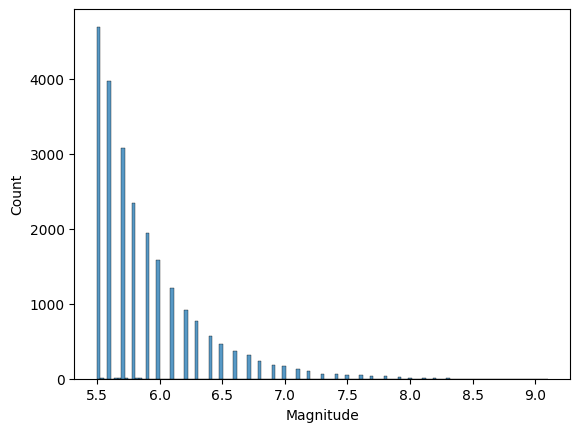

In [18]:
# checking the magnitude column with histplot
sns.histplot(dataframe_earthquake['Magnitude'])

In [19]:
# calculating the mean and std deviation of the dataframe
mean_Magnitude = dataframe_earthquake['Magnitude'].mean()
std_deviation_Magnitude = dataframe_earthquake['Magnitude'].std()
print(f"Mean Magnitude: {mean_Magnitude} ")
print(f"Standard Deviation Magnitude: {std_deviation_Magnitude} ")

Mean Magnitude: 5.882530753459764 
Standard Deviation Magnitude: 0.4230656393157772 


In [20]:
from scipy.stats import lognorm

sigma = np.sqrt(np.log(1 + (std_deviation_Magnitude / mean_Magnitude) ** 2))
mu = np.log(mean_Magnitude) - 0.5 * sigma ** 2

# Calculate probabilities that the Magnitude >9


prob9 = 1-lognorm.cdf(9, s=sigma, scale=np.exp(mu))
# Print the result
print("probabilities that the Magnitude >9:",prob9)


# Calculate probabilities that the Magnitude >8
prob8 = 1-lognorm.cdf(8, s=sigma, scale=np.exp(mu))
# Print the result
print("probabilities that the Magnitude >8:",prob8)


# Calculate probabilities that the Magnitude >7


prob7 = 1-lognorm.cdf(7, s=sigma, scale=np.exp(mu))
# Print the result
print("probabilities that the Magnitude >7:",prob7)

# Calculate probabilities that the Magnitude >6


prob6 = 1-lognorm.cdf(6, s=sigma, scale=np.exp(mu))
# Print the result
print("probabilities that the Magnitude >6:",prob6)



# Calculate probabilities that the 7< Magnitude <8
prob = prob7-prob8
# Print the result
print("probabilities that the 7< Magnitude <8:",prob)


# Calculate probabilities that the 6< Magnitude <7


prob = prob6-prob7
# Print the result
print("probabilities that the 6< Magnitude <7:",prob)

probabilities that the Magnitude >9: 1.2902452439789158e-09
probabilities that the Magnitude >8: 7.928142125690485e-06
probabilities that the Magnitude >7: 0.006998215764698945
probabilities that the Magnitude >6: 0.37782653266995303
probabilities that the 7< Magnitude <8: 0.006990287622573255
probabilities that the 6< Magnitude <7: 0.3708283169052541


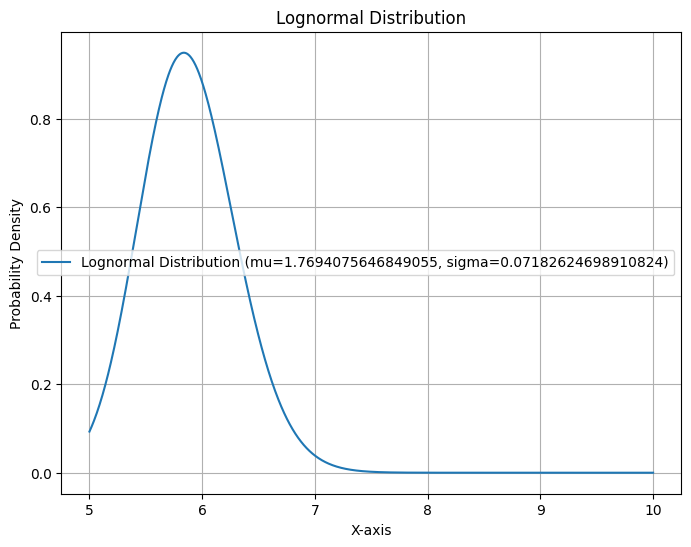

In [21]:
s = np.exp(mu)  # Scale parameter for the lognormal distribution

# Generate data points for the lognormal distribution
x = np.linspace(5, 10, 1000)  # Adjust the range as needed
y = lognorm.pdf(x, s=sigma, scale=s)

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(x, y, label=f"Lognormal Distribution (mu={mu}, sigma={sigma})")
plt.title("Lognormal Distribution")
plt.xlabel("X-axis")
plt.ylabel("Probability Density")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


Outlier Detection: The boxplot reveals the presence of outliers in the earthquake magnitude data. Outliers represent instances where the magnitude significantly deviates from the norm. In the context of seismic events, these outliers could indicate rare, high-magnitude earthquakes.

Magnitude Analysis: The code aims to investigate and understand earthquakes with larger magnitudes. This exploration is grounded in the assumption that such high-magnitude earthquakes occur less frequently, but they are of particular interest due to their potentially significant impact.

<Axes: xlabel='Depth'>

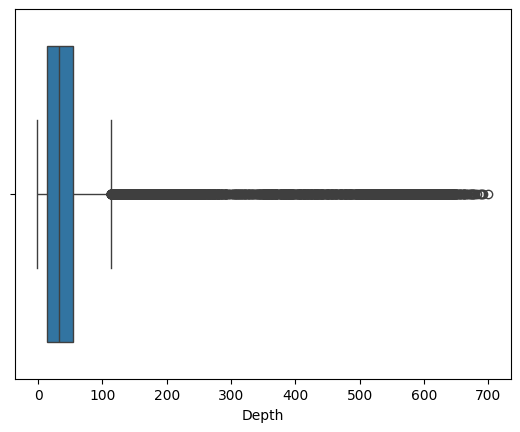

In [22]:
sns.boxplot(x=dataframe_earthquake['Depth'])

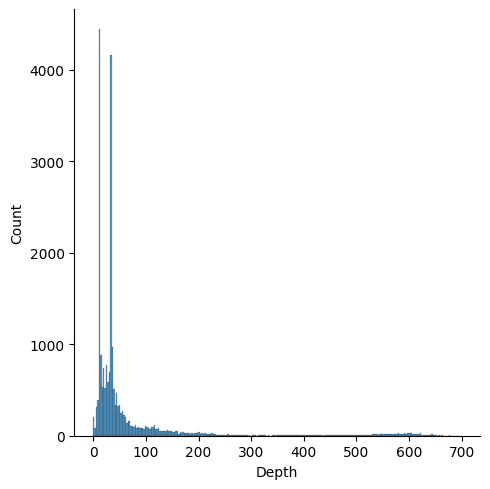

In [23]:
sns.displot(dataframe_earthquake['Depth'])

Depth Analysis: The primary objective of this analysis is to gain a better understanding of earthquakes occurring at different depths. The observation that "higher depths are less common" suggests that deep-seated seismic events occur less frequently compared to those at shallower depths.

Data Exploration: Boxplots provide a valuable tool for data exploration, allowing us to visualize data distributions, detect outliers, and understand the variation in earthquake depths

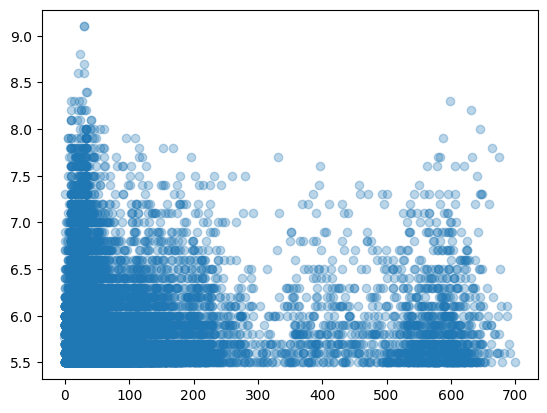

In [24]:
# checking the outliers
plt.scatter(x=dataframe_earthquake['Depth'],y=dataframe_earthquake['Magnitude'],alpha=0.3)
plt.show()

In [25]:
# dropping the id column from the dataframe as it is irrevelant
dataframe_earthquake.drop('ID',axis=1,inplace=True)
dataframe_earthquake

,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,Source,Location Source,Magnitude Source,Status
Date,,,,,,,,,,
1965-01-02,19.2460,145.6160,Earthquake,131.60,6.0,MW,ISCGEM,ISCGEM,ISCGEM,Automatic
1965-01-04,1.8630,127.3520,Earthquake,80.00,5.8,MW,ISCGEM,ISCGEM,ISCGEM,Automatic
1965-01-05,-20.5790,-173.9720,Earthquake,20.00,6.2,MW,ISCGEM,ISCGEM,ISCGEM,Automatic
1965-01-08,-59.0760,-23.5570,Earthquake,15.00,5.8,MW,ISCGEM,ISCGEM,ISCGEM,Automatic
1965-01-09,11.9380,126.4270,Earthquake,15.00,5.8,MW,ISCGEM,ISCGEM,ISCGEM,Automatic
...,...,...,...,...,...,...,...,...,...,...
2016-12-28,38.3917,-118.8941,Earthquake,12.30,5.6,ML,NN,NN,NN,Reviewed
2016-12-28,38.3777,-118.8957,Earthquake,8.80,5.5,ML,NN,NN,NN,Reviewed
2016-12-28,36.9179,140.4262,Earthquake,10.00,5.9,MWW,US,US,US,Reviewed


In [26]:
# checking the numerical colmuns of the dataframe
data_num = dataframe_earthquake.select_dtypes(include = ['float64', 'int64'])
data_num

,Latitude,Longitude,Depth,Magnitude
Date,,,,
1965-01-02,19.2460,145.6160,131.60,6.0
1965-01-04,1.8630,127.3520,80.00,5.8
1965-01-05,-20.5790,-173.9720,20.00,6.2
1965-01-08,-59.0760,-23.5570,15.00,5.8
1965-01-09,11.9380,126.4270,15.00,5.8
...,...,...,...,...
2016-12-28,38.3917,-118.8941,12.30,5.6
2016-12-28,38.3777,-118.8957,8.80,5.5
2016-12-28,36.9179,140.4262,10.00,5.9


In [27]:
# checking the correlation of the magintude column with numerical column of the dataframe
data_num_corr = data_num.corr()['Magnitude'] 
data_num_corr 

Latitude     0.034987
Longitude    0.038579
Depth        0.023457
Magnitude    1.000000
Name: Magnitude, dtype: float64

<Axes: >

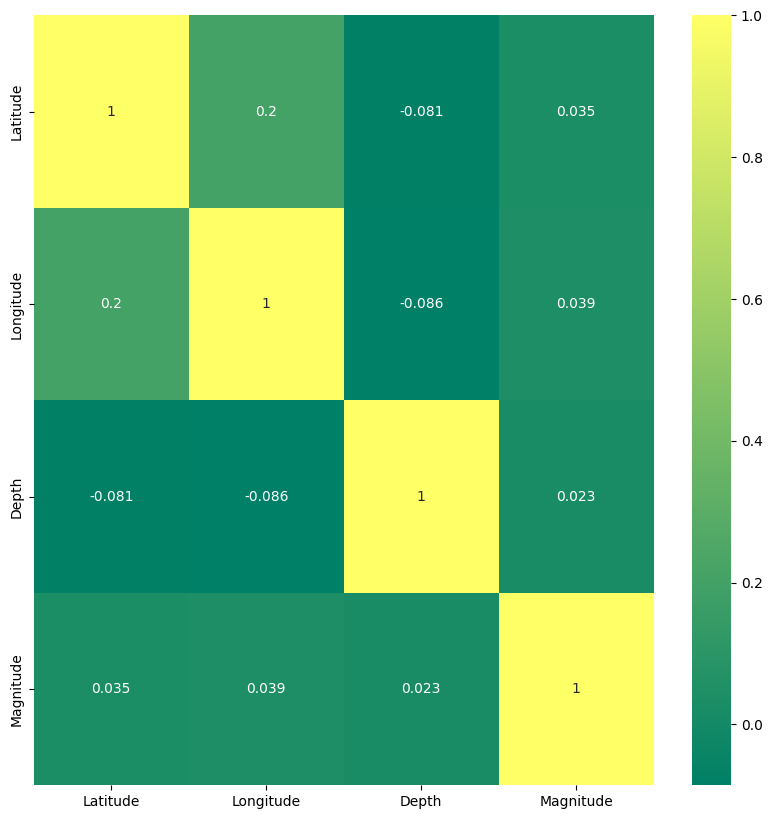

In [28]:
# showing the heatmap for the correlation of numerical columns with each other
plt.figure(figsize=(10,10))
sns.heatmap(data_num.corr(), annot=True, cmap='summer')

<Figure size 1000x1000 with 0 Axes>

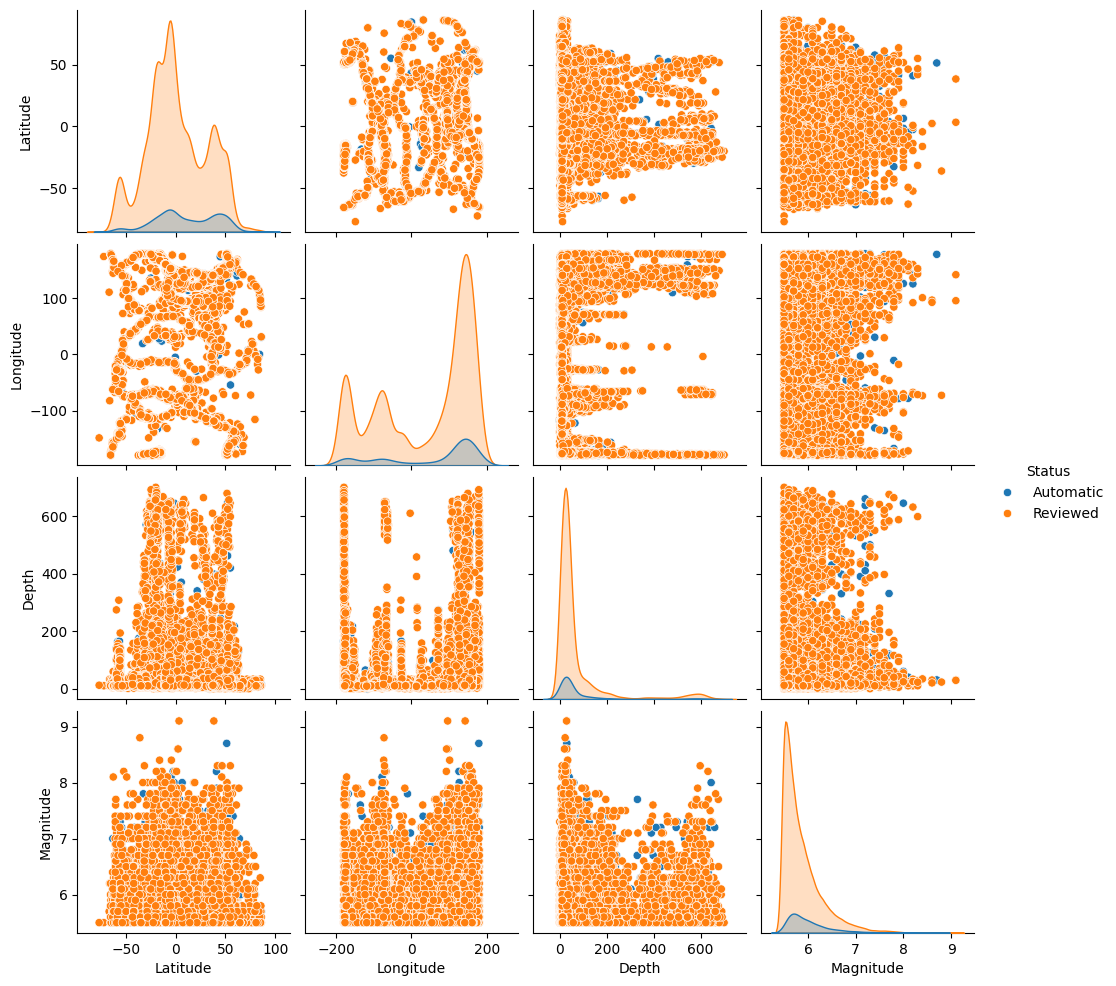

In [29]:
# plottin the pair plot
plt.figure(figsize=(10,10))
sns.pairplot(data=dataframe_earthquake,hue='Status',)

Outliers Detected: The pairplot visualization indicates the presence of outliers, particularly in the relationship between the 'Magnitude' and other columns. Outliers in the data can significantly impact statistical analysis and modeling.

Magnitude and Depth Distribution: The distribution of the 'Magnitude' & 'Depth' variables appear to be skewed, suggesting that it follows a log-normal distribution. A log-normal distribution is characterized by a right-skewed curve, and in this case, it implies that there might be a significant range of smaller magnitude values compared to larger ones.

Normalization Required: To enhance the reliability of our analysis and modeling, it's advisable to transform the 'Magnitude' & 'Depth' variables from a log-normal distribution to a normal distribution. This normalization process can help mitigate the impact of extreme values and make the data more suitable for various statistical techniques.

Scaling for Better Insights: Additionally, data scaling should be considered to provide more meaningful insights. Scaling ensures that different variables are on a common scale, making it easier to compare their contributions to the analysis. Common scaling methods include standardization or min-max scaling.

In [30]:
dataframe_earthquake['Magnitude Type'].value_counts()

Magnitude Type
MW     7725
MWC    5669
MB     3761
MWB    2458
MWW    1983
MS     1702
ML       77
MWR      26
MD        6
MH        5
Name: count, dtype: int64

MW (Moment Magnitude): Moment Magnitude is a widely used scale for measuring the size of an earthquake. 
It quantifies the seismic moment, which takes into account the fault area, slip along the fault, and rock rigidity. 
MW provides a more accurate measure of earthquake size, especially for larger events.

MWC (Centroid Moment Magnitude): This is another form of Moment Magnitude (MW) that calculates the seismic moment of an earthquake based on the centroid of the earthquake's source, which can be useful in studying more complex earthquake ruptures.

MB (Body-Wave Magnitude): Body-wave magnitudes are calculated based on the amplitude of P-waves (primary or compression waves) recorded on seismographs. MB is often used for intermediate and deep earthquakes.

MWB (Body-Wave Magnitude): This is another form of Body-Wave Magnitude (MB), which may be specific to certain seismic networks or regions.

MWW (Global Moment Tensor Magnitude): Global Moment Tensor Magnitude measures the seismic moment based on the complete seismic moment tensor solution of an earthquake, which provides information about the earthquake's faulting mechanism and orientation.

MS (Surface-Wave Magnitude): Surface-wave magnitudes are calculated based on the amplitudes of surface waves, particularly Love and Rayleigh waves. MS is typically used for shallow earthquakes and provides a measure of the earthquake's size at the Earth's surface.

ML (Local Magnitude): Local Magnitude is a scale used to estimate the size of an earthquake in a specific region. It is similar to the Richter scale but may be adjusted to account for local geological conditions.

MWR (Regional Moment Magnitude): Regional Moment Magnitude is a variant of Moment Magnitude (MW) that is specifically adapted for regional or local earthquake studies.

MD (Duration Magnitude): Duration Magnitude estimates the size of an earthquake by considering the duration of shaking it produces. This can be particularly useful for assessing the impact of long-duration, slow slip events.

MH (Haskell Magnitude): Haskell Magnitude is a type of magnitude scale, often used in geophysics and engineering seismology, to estimate the energy release during underwater earthquakes or those associated with tsunamis.

Each of these magnitude types has its specific uses and is often chosen based on the data available and the purpose of the seismic analysis or research. Moment Magnitude (MW) and Surface-Wave Magnitude (MS) are among the most commonly used scales for characterizing earthquake size.

In [31]:
dataframe_earthquake["Type"].value_counts()

Type
Earthquake           23232
Nuclear Explosion      175
Explosion                4
Rock Burst               1
Name: count, dtype: int64

Earthquake Type Distribution: The code shows a breakdown of the number of occurrences for each earthquake type category. The dominant category is "Earthquake" with 23,231 instances, followed by "Nuclear Explosion" with 175 instances, "Explosion" with 4 instances, and "Rock Burst" with 1 instance.

Insights into Data Composition: This summary gives us insights into the composition of the seismic event dataset, emphasizing that "Earthquake" is by far the most common event type. The presence of other types such as "Nuclear Explosion," "Explosion," and "Rock Burst" is notable but less frequent.

Data Exploration: This type of analysis is a fundamental step in understanding the dataset's characteristics and can guide further exploration or analysis of the data.

In [32]:
# removing the outliers
z_scores = np.abs(stats.zscore(data_num))

# Define a Z-score threshold (e.g., 2 for a 95% confidence interval)
z_threshold = 1

# Identify and remove outliers


outliers = np.where(z_scores > z_threshold)
cleaned_data = data_num[~(z_scores > z_threshold)]

In [33]:
cleaned_data

,Latitude,Longitude,Depth,Magnitude
Date,,,,
1965-01-02,19.2460,145.6160,131.60,6.0
1965-01-04,1.8630,127.3520,80.00,5.8
1965-01-05,-20.5790,NaN,20.00,6.2
1965-01-08,NaN,-23.5570,15.00,5.8
1965-01-09,11.9380,126.4270,15.00,5.8
...,...,...,...,...
2016-12-28,NaN,NaN,12.30,5.6
2016-12-28,NaN,NaN,8.80,5.5
2016-12-28,NaN,140.4262,10.00,5.9


In [34]:
dataframe_earthquake

,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,Source,Location Source,Magnitude Source,Status
Date,,,,,,,,,,
1965-01-02,19.2460,145.6160,Earthquake,131.60,6.0,MW,ISCGEM,ISCGEM,ISCGEM,Automatic
1965-01-04,1.8630,127.3520,Earthquake,80.00,5.8,MW,ISCGEM,ISCGEM,ISCGEM,Automatic
1965-01-05,-20.5790,-173.9720,Earthquake,20.00,6.2,MW,ISCGEM,ISCGEM,ISCGEM,Automatic
1965-01-08,-59.0760,-23.5570,Earthquake,15.00,5.8,MW,ISCGEM,ISCGEM,ISCGEM,Automatic
1965-01-09,11.9380,126.4270,Earthquake,15.00,5.8,MW,ISCGEM,ISCGEM,ISCGEM,Automatic
...,...,...,...,...,...,...,...,...,...,...
2016-12-28,38.3917,-118.8941,Earthquake,12.30,5.6,ML,NN,NN,NN,Reviewed
2016-12-28,38.3777,-118.8957,Earthquake,8.80,5.5,ML,NN,NN,NN,Reviewed
2016-12-28,36.9179,140.4262,Earthquake,10.00,5.9,MWW,US,US,US,Reviewed


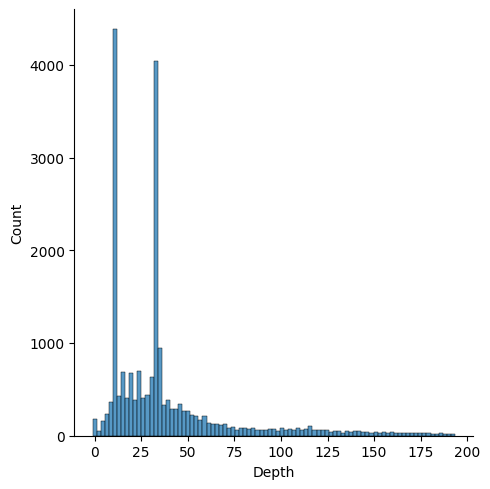

In [35]:
sns.displot(cleaned_data['Depth'])

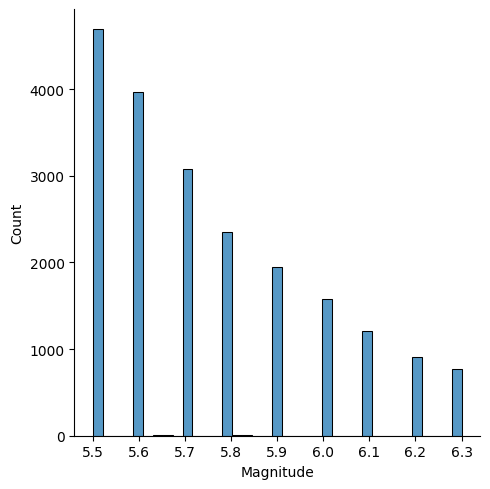

In [36]:
sns.displot(cleaned_data['Magnitude'])

C:\Users\DELL\AppData\Local\Temp\ipykernel_38396\3274076239.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataframe_earthquake['Depth'])


<Axes: xlabel='Depth', ylabel='Density'>

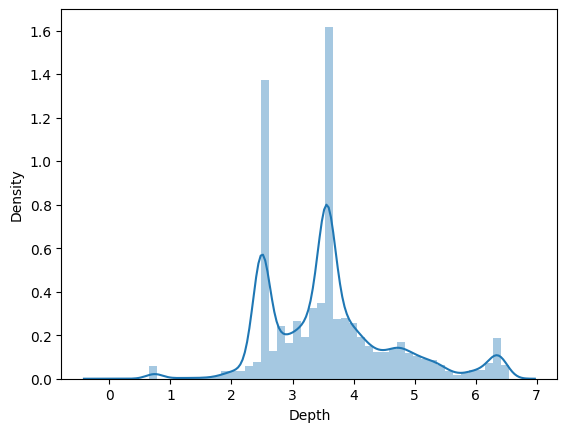

In [37]:
# removing the skewness of the depth column by converting into logarithmic distribution
dataframe_earthquake['Depth']=np.log(dataframe_earthquake['Depth']-dataframe_earthquake['Depth'].min()+1)
sns.distplot(dataframe_earthquake['Depth'])

C:\Users\DELL\AppData\Local\Temp\ipykernel_38396\3515782754.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataframe_earthquake['Magnitude'])


<Axes: xlabel='Magnitude', ylabel='Density'>

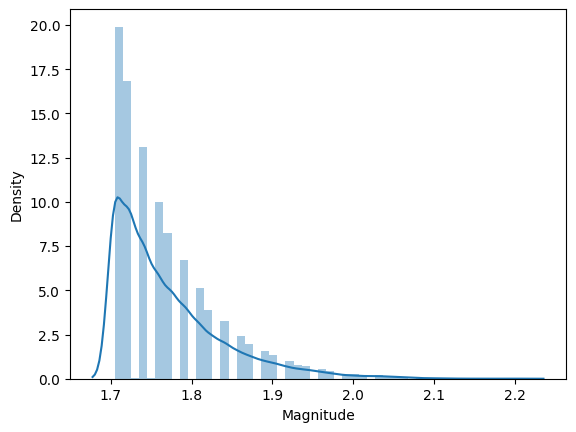

In [38]:
# removing the skewness of the magnitude column by converting into logarithmic distribution\
dataframe_earthquake['Magnitude']=np.log(dataframe_earthquake['Magnitude'])
sns.distplot(dataframe_earthquake['Magnitude'])

In [39]:
# one hot encoding for categorical columns
dataframe_earthquake = pd.get_dummies(data=dataframe_earthquake,drop_first=True,dtype='i')
dataframe_earthquake

,Latitude,Longitude,Depth,Magnitude,Type_Explosion,Type_Nuclear Explosion,Type_Rock Burst,Magnitude Type_MD,Magnitude Type_MH,Magnitude Type_ML,Magnitude Type_MS,Magnitude Type_MW,Magnitude Type_MWB,Magnitude Type_MWC,Magnitude Type_MWR,Magnitude Type_MWW,Source_ATLAS,Source_CI,Source_GCMT,Source_ISCGEM,Source_ISCGEMSUP,Source_NC,Source_NN,Source_OFFICIAL,Source_PR,Source_SE,Source_US,Source_UW,Location Source_AEIC,Location Source_AG,Location Source_AGS,Location Source_AK,Location Source_ATH,Location Source_ATLAS,Location Source_B,Location Source_BEO,Location Source_BOU,Location Source_BRK,Location Source_CAR,Location Source_CASC,...,Location Source_SE,Location Source_SJA,Location Source_SLC,Location Source_SPE,Location Source_TAP,Location Source_TEH,Location Source_THE,Location Source_THR,Location Source_TUL,Location Source_U,Location Source_UCR,Location Source_UNM,Location Source_US,Location Source_US_WEL,Location Source_UW,Location Source_WEL,Magnitude Source_1009,Magnitude Source_1020,Magnitude Source_1023,Magnitude Source_AK,Magnitude Source_ATLAS,Magnitude Source_BRK,Magnitude Source_CI,Magnitude Source_GCMT,Magnitude Source_GUC,Magnitude Source_HRV,Magnitude Source_ISCGEM,Magnitude Source_NC,Magnitude Source_NIED,Magnitude Source_NN,Magnitude Source_OFFICIAL,Magnitude Source_PAR,Magnitude Source_PGC,Magnitude Source_PR,Magnitude Source_SE,Magnitude Source_US,Magnitude Source_US_GCMT,Magnitude Source_US_PGC,Magnitude Source_UW,Status_Reviewed
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1965-01-02,19.2460,145.6160,4.895598,1.791759,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1965-01-04,1.8630,127.3520,4.407938,1.757858,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1965-01-05,-20.5790,-173.9720,3.095578,1.824549,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1965-01-08,-59.0760,-23.5570,2.839078,1.757858,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1965-01-09,11.9380,126.4270,2.839078,1.757858,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-28,38.3917,-118.8941,2.667228,1.722767,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2016-12-28,38.3777,-118.8957,2.388763,1.704748,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2016-12-28,36.9179,140.4262,2.493205,1.774952,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1


In [41]:
from tensorflow.keras.layers import Dense, InputLayer,Normalization
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import Accuracy,AUC
from tensorflow.keras.optimizers import Adam

In [42]:
# separating the target aand independent columns
X=dataframe_earthquake.iloc[:,:-1]
y=dataframe_earthquake.iloc[:,-1]

In [43]:
X

,Latitude,Longitude,Depth,Magnitude,Type_Explosion,Type_Nuclear Explosion,Type_Rock Burst,Magnitude Type_MD,Magnitude Type_MH,Magnitude Type_ML,Magnitude Type_MS,Magnitude Type_MW,Magnitude Type_MWB,Magnitude Type_MWC,Magnitude Type_MWR,Magnitude Type_MWW,Source_ATLAS,Source_CI,Source_GCMT,Source_ISCGEM,Source_ISCGEMSUP,Source_NC,Source_NN,Source_OFFICIAL,Source_PR,Source_SE,Source_US,Source_UW,Location Source_AEIC,Location Source_AG,Location Source_AGS,Location Source_AK,Location Source_ATH,Location Source_ATLAS,Location Source_B,Location Source_BEO,Location Source_BOU,Location Source_BRK,Location Source_CAR,Location Source_CASC,...,Location Source_RSPR,Location Source_SE,Location Source_SJA,Location Source_SLC,Location Source_SPE,Location Source_TAP,Location Source_TEH,Location Source_THE,Location Source_THR,Location Source_TUL,Location Source_U,Location Source_UCR,Location Source_UNM,Location Source_US,Location Source_US_WEL,Location Source_UW,Location Source_WEL,Magnitude Source_1009,Magnitude Source_1020,Magnitude Source_1023,Magnitude Source_AK,Magnitude Source_ATLAS,Magnitude Source_BRK,Magnitude Source_CI,Magnitude Source_GCMT,Magnitude Source_GUC,Magnitude Source_HRV,Magnitude Source_ISCGEM,Magnitude Source_NC,Magnitude Source_NIED,Magnitude Source_NN,Magnitude Source_OFFICIAL,Magnitude Source_PAR,Magnitude Source_PGC,Magnitude Source_PR,Magnitude Source_SE,Magnitude Source_US,Magnitude Source_US_GCMT,Magnitude Source_US_PGC,Magnitude Source_UW
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1965-01-02,19.2460,145.6160,4.895598,1.791759,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1965-01-04,1.8630,127.3520,4.407938,1.757858,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1965-01-05,-20.5790,-173.9720,3.095578,1.824549,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1965-01-08,-59.0760,-23.5570,2.839078,1.757858,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1965-01-09,11.9380,126.4270,2.839078,1.757858,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-28,38.3917,-118.8941,2.667228,1.722767,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2016-12-28,38.3777,-118.8957,2.388763,1.704748,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2016-12-28,36.9179,140.4262,2.493205,1.774952,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [44]:
y

Date
1965-01-02    0
1965-01-04    0
1965-01-05    0
1965-01-08    0
1965-01-09    0
             ..
2016-12-28    1
2016-12-28    1
2016-12-28    1
2016-12-29    1
2016-12-30    1
Name: Status_Reviewed, Length: 23412, dtype: int32

In [45]:
# dividing dataframe into train ,test and val dataset
TRAIN_RATIO = 0.8
VAL_RATIO = 0.1
TEST_RATIO = 0.1
DATASET_SIZE = len(X)

In [46]:
# making the taining dataset
X_train = X[:int(DATASET_SIZE*TRAIN_RATIO)]
y_train = y[:int(DATASET_SIZE*TRAIN_RATIO)]
print(X_train.shape)
print(y_train.shape)

(18729, 98)
(18729,)


In [48]:
# making the validation set
X_val = X[int(DATASET_SIZE*TRAIN_RATIO):int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO))]
y_val = y[int(DATASET_SIZE*TRAIN_RATIO):int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO))]
print(X_val.shape)
print(y_val.shape)

(2341, 98)
(2341,)


In [49]:
# making the test dataset
X_test = X[int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO)):]
y_test = y[int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO)):]
print(X_test.shape)
print(y_test.shape)

(2342, 98)
(2342,)


In [50]:
# making the model using and input layer ,normalisation layer and 4 dense layers
model = tf.keras.Sequential([
    InputLayer(input_shape=(98,)),
    Normalization(),
    Dense(32, activation="relu"),
    Dense(64, activation="relu"),
    Dense(128, activation="relu"),
    Dense(256, activation="relu"),
    Dense(1, activation="sigmoid")
])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizati  (None, 98)                197       
 on)                                                             
                                                                 
 dense (Dense)               (None, 32)                3168      
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 128)               8320      
                                                                 
 dense_3 (Dense)             (None, 256)               33024     
                                                                 
 dense_4 (Dense)             (None, 1)                 257       
                                                       

In [51]:
# compiling the model using adam optimiser , binary cross entropy as loss and using  accuracy as metrics
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=[Accuracy(name="accuracy")]
)

In [52]:
tf.keras.backend.clear_session() # clearing the backend session

In [53]:
# training the model
history=model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, verbose=1)

Epoch 1/100

586/586 [==============================] - 7s 6ms/step - loss: 0.1156 - accuracy: 0.0219 - val_loss: 9.6162e-04 - val_accuracy: 0.0013
Epoch 2/100
586/586 [==============================] - 2s 4ms/step - loss: 0.0027 - accuracy: 0.1726 - val_loss: 8.4661e-04 - val_accuracy: 0.0453
Epoch 3/100
586/586 [==============================] - 3s 4ms/step - loss: 4.9552e-05 - accuracy: 0.2122 - val_loss: 0.0010 - val_accuracy: 0.2038
Epoch 4/100
586/586 [==============================] - 3s 5ms/step - loss: 1.3011e-05 - accuracy: 0.3203 - val_loss: 0.0014 - val_accuracy: 0.4114
Epoch 5/100
586/586 [==============================] - 3s 5ms/step - loss: 6.2564e-06 - accuracy: 0.4746 - val_loss: 0.0012 - val_accuracy: 0.4494
Epoch 6/100
586/586 [==============================] - 3s 5ms/step - loss: 2.6163e-06 - accuracy: 0.6413 - val_loss: 9.9266e-04 - val_accuracy: 0.5946
Epoch 7/100
586/586 [==============================] - 3s 5ms/step - loss: 1.5351e-06 - accuracy: 0.7537 - val_lo

In [54]:
# getting the accuracy of the model
model.evaluate(X_test,y_test)

74/74 [==============================] - 0s 4ms/step - loss: 6.2337e-04 - accuracy: 0.9885


[0.0006233664462342858, 0.9884713888168335]

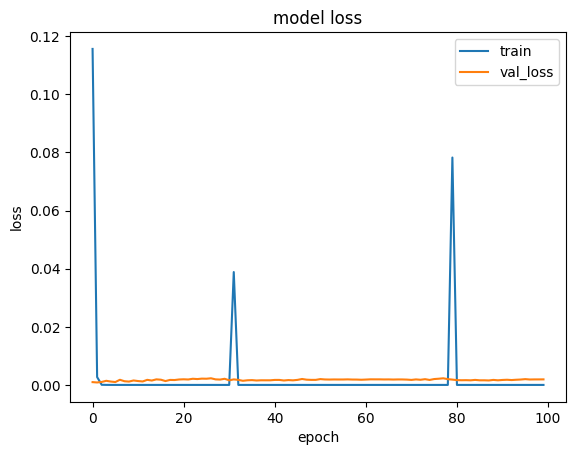

In [55]:
# plotting the train loss against the validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val_loss'])
plt.show()

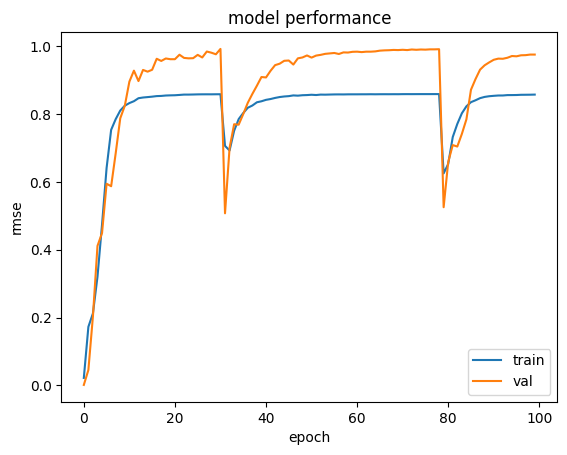

In [56]:
# plotting the train accuracy against validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model performance')
plt.ylabel('rmse')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.show()

# making the model predict maginitude and depth

In [57]:
# taking latitude and longitude for independent variables and depth and magnitude for target variables
X1=dataframe_earthquake[['Latitude','Longitude']]
y1=dataframe_earthquake[['Magnitude','Depth']]

In [58]:
# splitting the data into train and test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [61]:
# defining the layout of the model
model2 = tf.keras.Sequential([
    InputLayer(input_shape=(2,)),
    Dense(16, activation="relu"),
    Dense(32, activation="relu"),
    Dense(2, activation="linear")
])

In [62]:
# compiling the model using adam optimiser ,mean_squared_error as loss and accuracy metrics
model2.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])

# fitting the model with xtrain and ytrain and xtest and ytest as validation dataset
history2=model2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, verbose=1)


Epoch 1/100

586/586 [==============================] - 6s 6ms/step - loss: 8.6502 - mse: 8.6502 - val_loss: 0.8079 - val_mse: 0.8079
Epoch 2/100
586/586 [==============================] - 3s 5ms/step - loss: 0.7649 - mse: 0.7649 - val_loss: 0.7895 - val_mse: 0.7895
Epoch 3/100
586/586 [==============================] - 3s 5ms/step - loss: 0.6541 - mse: 0.6541 - val_loss: 0.7340 - val_mse: 0.7340
Epoch 4/100
586/586 [==============================] - 3s 5ms/step - loss: 0.6012 - mse: 0.6012 - val_loss: 0.5431 - val_mse: 0.5431
Epoch 5/100
586/586 [==============================] - 3s 5ms/step - loss: 0.5697 - mse: 0.5697 - val_loss: 0.6726 - val_mse: 0.6726
Epoch 6/100
586/586 [==============================] - 3s 5ms/step - loss: 0.5694 - mse: 0.5694 - val_loss: 0.6411 - val_mse: 0.6411
Epoch 7/100
586/586 [==============================] - 3s 5ms/step - loss: 0.5621 - mse: 0.5621 - val_loss: 0.5246 - val_mse: 0.5246
Epoch 8/100
586/586 [==============================] - 4s 6ms/step 

In [64]:
# evaluating the model
model2.evaluate(X_test,y_test)

147/147 [==============================] - 1s 3ms/step - loss: 0.4506 - mse: 0.4506


[0.45061638951301575, 0.45061638951301575]